<a href="https://colab.research.google.com/github/BeverlyHuang/Digit-Classification/blob/master/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification


### Key Evaluation Terms



*  [Amazon ML Key Classification Metrics](https://docs.aws.amazon.com/machine-learning/latest/dg/binary-model-insights.html?icmpid=docs_machinelearning_console)
*  [sklearn classification metrics
](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)




*   **Precision**:  Measures the fraction of actual positives among those examples that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*  ** Recall**:  Measures the fraction of actual positives that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*   **F1-score**:  Weighted average of recall and precision


* **AUC**:  AUC measures the ability of the model to predict a higher score for positive examples as compared to negative examples

* **False Positive Rat**e:  The false positive rate (FPR) measures the false alarm rate or the fraction of actual negatives that are predicted as positive. The range is 0 to 1. A smaller value indicates better predictive accuracy





##Ingestion

###Import Library

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, svm, metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

###Load Data

In [0]:
# The digits dataset
digits = datasets.load_digits()

In [0]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [0]:
digits.data.shape

(1797, 64)

In [0]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## EDA

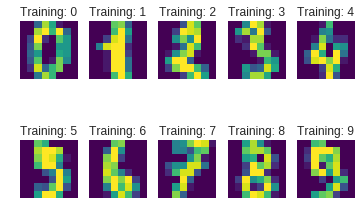

In [0]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 10 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.viridis, interpolation='nearest')
    plt.title('Training: %i' % label)


## Modeling using SVC

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

###Transform data for modeling

In [0]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

###Train Test Split

In [0]:
# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train = X[:n_samples // 2]
y_train = y[:n_samples // 2]
X_test = X[n_samples // 2:]
y_test = y[n_samples // 2:]

###Create SVC model to fit data

In [0]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], y_train)

# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)

###Show prediction

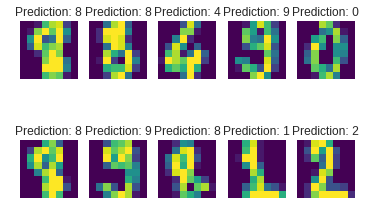

In [0]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.viridis, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

###Classification report and Confusion matrix

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

### Evaluate the model using the Yellowbrick Confusion Matrix



http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html


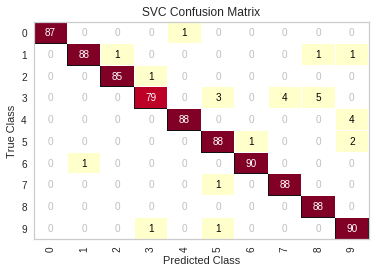

In [0]:
classes=[0,1,2,3,4,5,6,7,8,9]

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(classifier, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

### Evaluate the model using ROCAUC

http://www.scikit-yb.org/en/latest/api/classifier/rocauc.html


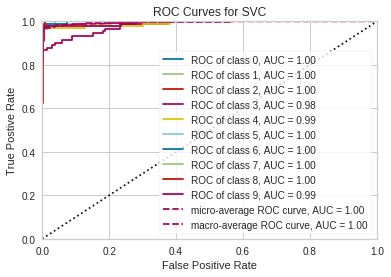

In [0]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(classifier, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

##Modeling using Logistic Regression

###Create a Logistic Regression model

In [0]:
model = LogisticRegression()

# We learn the digits on the first half of the digits
model.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
expected = y_test
predicted = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.86      0.89      0.88        91
           2       0.98      0.98      0.98        86
           3       0.99      0.82      0.90        91
           4       0.99      0.93      0.96        92
           5       0.83      0.90      0.86        91
           6       0.94      0.99      0.96        91
           7       0.98      0.89      0.93        89
           8       0.89      0.88      0.88        88
           9       0.83      0.92      0.87        92

   micro avg       0.92      0.92      0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92 

### Evaluate the model using the Yellowbrick Confusion Matrix



http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


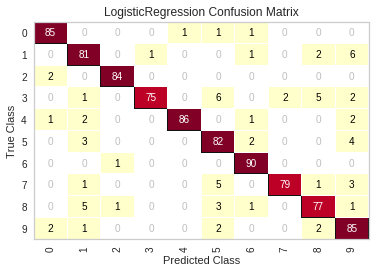

In [0]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

### Evaluate the model using ROCAUC

http://www.scikit-yb.org/en/latest/api/classifier/rocauc.html


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


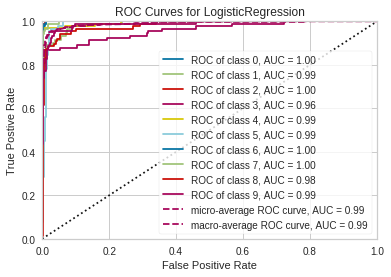

In [0]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

##Conclusion

The project aims to classify written digits based on image data. Two models are used in this project.
SVC model classifies digits based on "images" attribute of the dataset (which is an 8*8 image), while logistics regression model uses "data" attribute of the dataset (which is a single array of features about the 64 pixels) We evaluate the accuracy of two models using Confusion matrix and ROC curve.The result shows that SVC model has higher accuracy in classification.